# TP4 - PDS - Janelamento
Lucas Pereira Fernandes - 08/05/2021

In [1]:
# here goes your include modules...
import numpy as np
import matplotlib.pyplot as plt

# in this TP we will use scipy modul to read the files
from scipy.io import wavfile
# if you rather to use librosa, use the lines below
import librosa

# below are the module used to play the audio vectors in jupyterlab
from IPython.display import Audio

**TP04 - Janelamento.**

---

[Funções de janelamento](https://en.wikipedia.org/wiki/Window_function) são muito utilizadas em processamento de sinais. Seu papel é fixar uma quantidade de amostras para serem processadas. 

Uma função de janelamento é uma função matemática que é igual a zero fora de um determinado intervalo, e geralmente simétrica no entorno de um ponto central. Usualmente o ponto central é o ponto máximo do intervalo (à depender do tipo de janela).

Em várias ocasiões é preciso que um sinal $x(t)$ qualquer deva ser examinado por segmentos de tamanho menor do que o tamanho do sinal. Esse método modifica o conteúdo do sinal e afeta o conteúdo frequencial do sinal causando "vazamento espectral" ([spectral leakage](https://en.wikipedia.org/wiki/Spectral_leakage)).

Diversos tipos de funções de janelamento são portanto utilizadas para minimizar o efeito de vazamento espectral.

Este trabalho prático será utilizado no intuito de estudar os efeitos de janelamento em sinais unidimensionais.

In [2]:
# O sinal utilizado nesse trabalho será o sinal do spoltech
# e está no github, antes de fazer as células funcionarem
# faça o download do arquivo LDC2006S16.wav e coloque-o 
# em uma pasta no drive para que você possa utilizá-lo com
# o google colab.

data_sr, data = wavfile.read('LDC2006S16.wav')
Audio(data, rate=data_sr)

In [4]:
# Nessa célula definimos algumas janelas que serão utilizadas
# no decorrer desse trabalho. Explicações sobre o efeito de
# cada uma das funções de janelamento bem como suas formulações
# podem ser encontrados em https://en.wikipedia.org/wiki/Window_function

def hannWindow(N):
    n = np.linspace(-N/2, N/2, N)
    return 0.5*(1+np.cos(2*np.pi*n/N))

def hammingWindow(N, a0=0.53836):
    n = np.linspace(0, N, N)
    return a0-(1-a0)*(np.cos(2*np.pi*n/N))

def gaussianWindow(N, sigma=0.5):
    n = np.linspace(0, N, N)
    return np.exp(-0.5*((n-N/2)/(sigma*N/2))**2)

def blackmanHarrisWindow(N):
    a0, a1, a2, a3 = 0.35875, 0.48829, 0.14128, 0.01168
    n = np.linspace(0, N, N)
    return a0-a1*np.cos(2*np.pi*n/N)+a2*np.cos(4*np.pi*n/N)-a3*np.cos(6*np.pi*n/N)

def flattopWindow(N):
    a0, a1, a2, a3, a4 = 0.21557895, 0.41663158, 0.277263158, 0.083578947, 0.006947368
    n = np.linspace(0, N, N)
    return a0-a1*np.cos(2*np.pi*n/N)+a2*np.cos(4*np.pi*n/N)-a3*np.cos(6*np.pi*n/N)+a4*np.cos(8*np.pi*n/N)

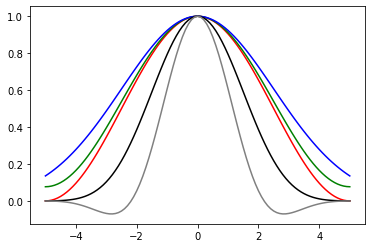

In [44]:
# plot de cada uma das funções de janelamento definidas 
# na célula acima. Todos as funções mostradas no gráfico
# variam de -5 a 5, possuem 101 amostras.

w = 10
N = 101
plt.plot(np.linspace(-w/2, w/2, N), hannWindow(N), color='r')
plt.plot(np.linspace(-w/2, w/2, N), hammingWindow(N), color='g')
plt.plot(np.linspace(-w/2, w/2, N), gaussianWindow(N), color='b')
plt.plot(np.linspace(-w/2, w/2, N), blackmanHarrisWindow(N), color='k')
plt.plot(np.linspace(-w/2, w/2, N), flattopWindow(N), color='gray')

**ATENÇÃO**: Fique atento ao tamanho das funções e da quantidade de amostas da função de janelamento em cada uma das questões. Não é preciso usar *w=10* e/ou *N=101* para obter as respostas, mas uma combinação que melhor se adeque às suas explicações.

---

Responda:

**1.** Crie uma função que faça o plot da transformada de Fourier de cada uma das cinco funções de janelamento definidas nesse notebook. Você pode utilizar subplot para mostrar cada **dft** em um plot diferente.

In [45]:
def dft(x, n=N):
  N = len(x)

  t = np.linspace(0, N, N)
  F = np.linspace(0, n-1, n)
  
  e = lambda f: np.exp(-1j * 2 * np.pi * f * t / N)
  
  ft = np.zeros((N, n), dtype = np.complex)

  for k, f in enumerate(F):
    ft[:, k] = e(f) * x

  return F, np.sum(ft, axis = 0)

In [61]:
def plotaDFTJanelas():
    plt.figure(figsize=(16,15))

    freq, TF = dft(hannWindow(N))
    plt.subplot(321)
    plt.stem(freq[:N//2], np.abs(TF)[:N//2]/N)
    plt.title('hannWindow')

    freq, TF = dft(hammingWindow(N))
    plt.subplot(322)
    plt.stem(freq[:N//2], np.abs(TF)[:N//2]/N)
    plt.title('hammingWindow')

    freq, TF = dft(gaussianWindow(N))
    plt.subplot(323)
    plt.stem(freq[:N//2], np.abs(TF)[:N//2]/N)
    plt.title('gaussianWindow')

    freq, TF = dft(blackmanHarrisWindow(N))
    plt.subplot(324)
    plt.stem(freq[:N//2], np.abs(TF)[:N//2]/N)
    plt.title('blackmanHarrisWindow')

    freq, TF = dft(flattopWindow(N))
    plt.subplot(325)
    plt.stem(freq[:N//2], np.abs(TF)[:N//2]/N)
    plt.title('flattopWindow')

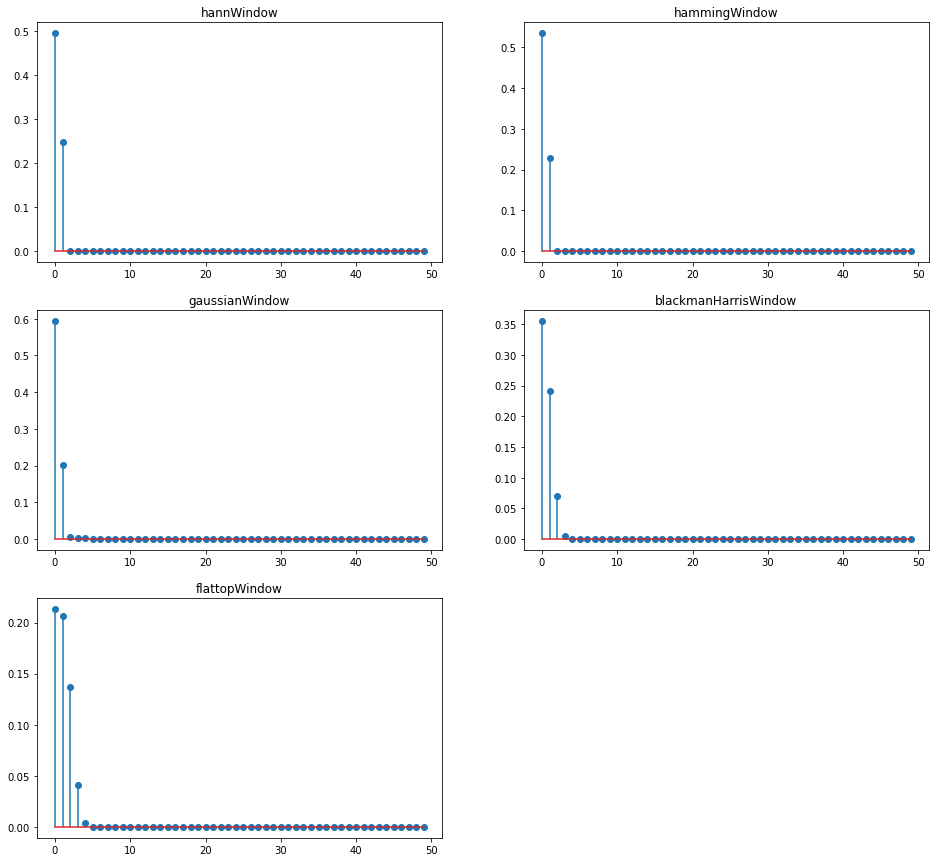

In [62]:
plotaDFTJanelas()

**2.** Crie uma função que calcule a média móvel do sinal que foi carregado na variável *data*.

In [103]:
def mediaMovel(sinal,k):
    #k é o Tamanho da média móvel (quantas amostras passadas vai pegar)
    resultado = np.zeros_like(sinal,dtype=np.float64)
    
    tamanho_sinal = sinal.size #tamanho do vetor de entrada
    aux = np.zeros([(k-1)+tamanho_sinal]) #vetor auxiliar (tipo zero-padding)
    aux[(k-1):] = data

    for marcador in range(tamanho_sinal):
        resultado[marcador] = aux[marcador:marcador+k].sum()/k
    return resultado

In [110]:
k = 10
media_movel = mediaMovel(data,k)
media_movel

array([  1.2,   1.6,   9.2, ...,   8.2,  -6.4, -18.2])

**3.** Utilize a resposta da questão anterior para criar uma funçào de convolução, e faça a convolução do sinal na variável *data* com cada uma das cinco funções de janelamento.

**4.** Crie os seguintes sinais senoidais:
  - $x_1[n] = \sin(2\pi f_0 n T_s)$
  - $x_2[n] = \sin(2\pi f_0 n T_s + \frac{\pi}{2})$
  - $x_3[n] = \sin(2\pi f_0 n T_s) + n[n]$

onde $n[n]$ é um ruído branco gaussiano de variância $\sigma^2=0.1$.

Crie uma figura com a transformada de Fourier de cada sinal e comente sobre a diferença espectral de cada um deles.

**5.** Utilize a janela gaussiana e a janela retangular em cada um dos sinais acima, faça a transformada de Fourier e comente sobre a difereça dos resultados.

**OBS1**: Os sinais devem ter o mesmo tamanho da figura.

**OBS2**: Faça os sinais serem de baixa frequência para que seja possível visualizar *facilmente* os efeitos em frequência.

**6.** Com base em suas respostas nas questões anteirores, reflita e escreva sobre a diferença da transformada de Fourier em cada uma das janelas, e como essa diferença influencia nas respostas da janela?

Resp.: